In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv"
df = pd.read_csv(url)


In [2]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.describe()


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [4]:
df.shape


(7787, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [7]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [8]:
print("\nData Types:")
print(df.dtypes)


Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [9]:
print("Content Types:")
print(df['type'].value_counts())

Content Types:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [10]:
print("Content Types:")
print(df['cast'].value_counts())

Content Types:
cast
David Attenborough                                                                                                                       18
Samuel West                                                                                                                              10
Jeff Dunham                                                                                                                               7
Craig Sechler                                                                                                                             6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                    6
                                                                                                                                         ..
Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers                   1


In [11]:
print("Content Types:")
print(df['country'].value_counts())

Content Types:
country
United States                                     2555
India                                              923
United Kingdom                                     397
Japan                                              226
South Korea                                        183
                                                  ... 
Germany, United States, United Kingdom, Canada       1
Peru, United States, United Kingdom                  1
Saudi Arabia, United Arab Emirates                   1
United Kingdom, France, United States, Belgium       1
France, Norway, Lebanon, Belgium                     1
Name: count, Length: 681, dtype: int64


In [12]:
print("Missing Value Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing Value Percentage:
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


In [13]:
df_clean = df.dropna(subset=['date_added', 'rating'])

we have removed rows that have missing values in column date_added and rating

In [14]:
df_clean.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast             718
country          505
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [31]:
df_clean['country'] = df_clean['country'].fillna(df_clean['country'].mode()[0])

C:\Users\Rushil\AppData\Local\Temp\ipykernel_19928\780736990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country'] = df_clean['country'].fillna(df_clean['country'].mode()[0])


In [16]:
print(df_clean.isnull().sum())



show_id            0
type               0
title              0
director        2376
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [17]:
df_clean['cast'] = df_clean['cast'].fillna(df_clean['cast'].mode()[0])

C:\Users\Rushil\AppData\Local\Temp\ipykernel_19928\3515680272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cast'] = df_clean['cast'].fillna(df_clean['cast'].mode()[0])


In [18]:
df_clean['director'] = df_clean['director'].fillna(df_clean['director'].mode()[0])

C:\Users\Rushil\AppData\Local\Temp\ipykernel_19928\715268126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['director'] = df_clean['director'].fillna(df_clean['director'].mode()[0])


In [19]:
df_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Clean completed 

Clean data overview

In [20]:
df_clean.shape


(7770, 12)

In [21]:
df_clean['country'].value_counts().head(10)

country
United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64

In [22]:
print("Content Types:")
print(df_clean['type'].value_counts())

Content Types:
type
Movie      5372
TV Show    2398
Name: count, dtype: int64


In [23]:
print("\nRelease Year Range:")
print(f"From {df_clean['release_year'].min()} to {df_clean['release_year'].max()}")


Release Year Range:
From 1925 to 2021


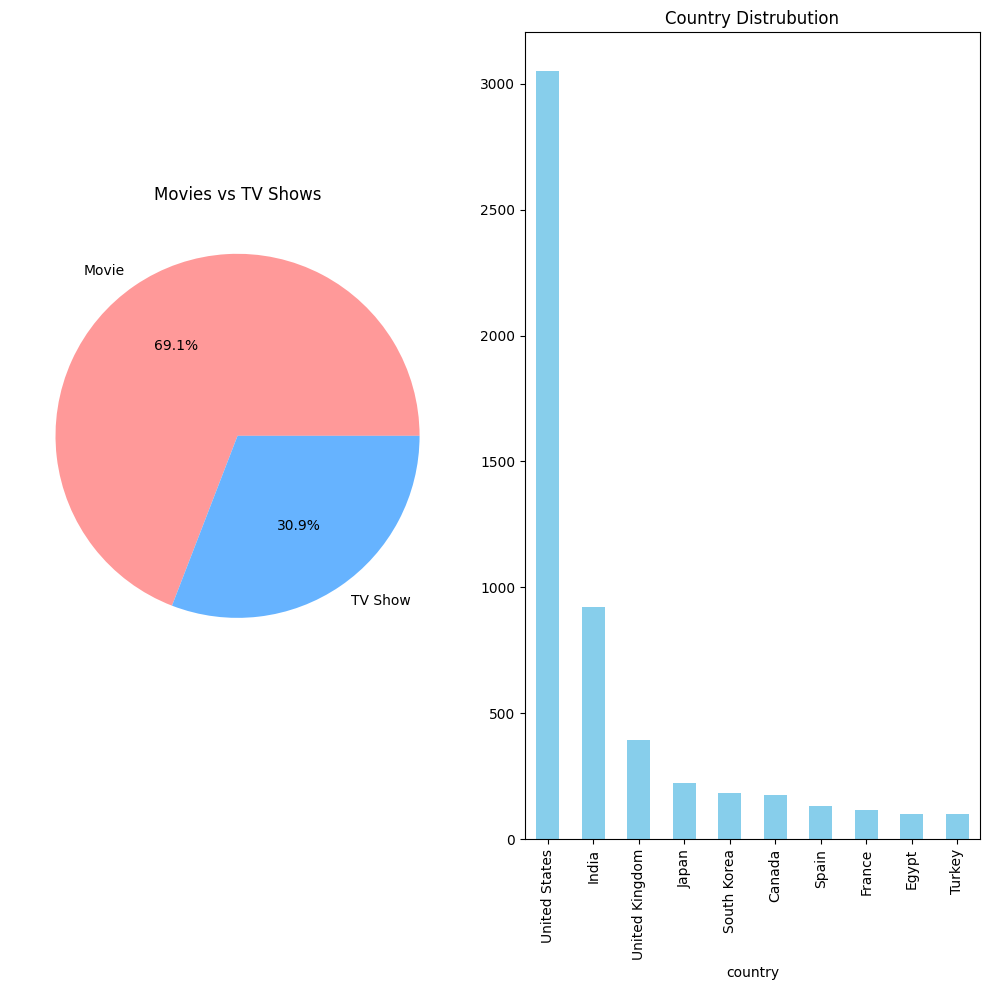

In [24]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
df_clean['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Movies vs TV Shows')
plt.ylabel('')

plt.subplot(1,2,2)
df_clean['country'].value_counts().head(10).plot(kind = 'bar', color= 'skyblue')
plt.title('Country Distrubution')
plt.ylabel('')
plt.xticks(rotation= 90)

plt.tight_layout()
plt.show()

In [25]:
df_clean['listed_in'].groupby

<bound method Series.groupby of 0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 7770, dtype: object>

In [27]:
def convert_to_minutes(duration_str):
    """
    Convert duration string to total minutes
    Movies: '90 min' → 90
    TV Shows: '2 Seasons' → 2 × 320 = 640
    """
    if pd.isna(duration_str):
        return np.nan
    
    duration_str = str(duration_str)
    
    # Extract the number
    num_match = pd.Series([duration_str]).str.extract(r'(\d+)').iloc[0, 0]
    if num_match is None:
        return np.nan
    
    num = float(num_match)
    
    # Check if it's seasons or minutes
    if 'season' in duration_str.lower():
        # TV Show: 1 season = 8 episodes × 40 min = 320 minutes
        episodes_per_season = 8
        minutes_per_episode = 40
        return num * episodes_per_season * minutes_per_episode
    elif 'min' in duration_str.lower():
        # Movie: already in minutes
        return num
    else:
        return np.nan

# Apply the conversion
df_clean['duration_min'] = df_clean['duration'].apply(convert_to_minutes)

print(df_clean[['title', 'type', 'duration', 'duration_min']].head(20))

     title     type   duration  duration_min
0       3%  TV Show  4 Seasons        1280.0
1     7:19    Movie     93 min          93.0
2    23:59    Movie     78 min          78.0
3        9    Movie     80 min          80.0
4       21    Movie    123 min         123.0
5       46  TV Show   1 Season         320.0
6      122    Movie     95 min          95.0
7      187    Movie    119 min         119.0
8      706    Movie    118 min         118.0
9     1920    Movie    143 min         143.0
10    1922    Movie    103 min         103.0
11    1983  TV Show   1 Season         320.0
12    1994  TV Show   1 Season         320.0
13   2,215    Movie     89 min          89.0
14    3022    Movie     91 min          91.0
15  Oct-01    Movie    149 min         149.0
16  Feb-09  TV Show   1 Season         320.0
17  22-Jul    Movie    144 min         144.0
18  15-Aug    Movie    124 min         124.0
19     '89    Movie     87 min          87.0


C:\Users\Rushil\AppData\Local\Temp\ipykernel_19928\4197021653.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_min'] = df_clean['duration'].apply(convert_to_minutes)


In [28]:
df_clean['duration_min'].head(20)

0     1280.0
1       93.0
2       78.0
3       80.0
4      123.0
5      320.0
6       95.0
7      119.0
8      118.0
9      143.0
10     103.0
11     320.0
12     320.0
13      89.0
14      91.0
15     149.0
16     320.0
17     144.0
18     124.0
19      87.0
Name: duration_min, dtype: float64

In [29]:
df_clean.to_csv('netflix_data.csv', index=False)
print("Data downloaded and saved as 'netflix_data.csv'")

Data downloaded and saved as 'netflix_data.csv'


In [30]:
df_clean.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1280.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0
